In [11]:
import netCDF4 as nc

import matplotlib as mpl
from matplotlib import pyplot as plt

import numpy as np
import xarray as xr

from scipy import signal
import scipy


In [12]:
path = '/Users/zcaspar/codes/Diagnostics/'
corr1 = xr.open_dataset(path+'uucorr_20.nc')
uu = corr1.uu/corr1.uu.sel(lag=0)
uu

<xarray.DataArray 'uu' (y_bins: 55, lag: 1440)>
array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [ 1.        ,  0.99563897,  0.98332257, ..., -0.10635464,
        -0.116323  , -0.12540394],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])
Coordinates:
  * y_bins   (y_bins) float64 25.0 75.0 125.0 ... 2.625e+03 2.675e+03 2.725e+03
  * lag      (lag) float64 0.0 0.006944 0.01389 0.02083 ... 9.979 9.986 9.993

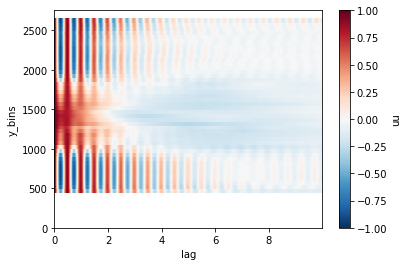

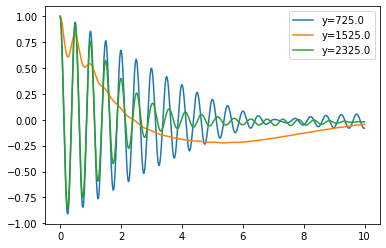

In [13]:
uu.plot()
plt.figure()
plt.plot(uu.lag,uu.sel(y_bins=700,method='nearest'),label='y=%s'%uu.sel(y_bins=700,method='nearest').y_bins.values)
plt.plot(uu.lag,uu.sel(y_bins=1500,method='nearest'),label='y=%s'%uu.sel(y_bins=1500,method='nearest').y_bins.values)
plt.plot(uu.lag,uu.sel(y_bins=2300,method='nearest'),label='y=%s'%uu.sel(y_bins=2300,method='nearest').y_bins.values)
plt.legend()

In [46]:
def Ctilde(Tt,t):
    return np.exp(-t/Tt)*np.cos(2*np.pi*om*t)
def Cbar(Tb,Om,t):
    return np.exp(-t/Tb)*np.cos(2*np.pi*Om*t)
def C(Tt,Tb,Omega,r,tau):
    return (1-r)*Cbar(Tb,Omega,tau)+r*Ctilde(Tt,tau)

In [15]:
tau = uu.lag 
om = 2 #internal waves frequency
Tt = 1 #nonstationarity timescale
f = uu.sel(y_bins=700,method='nearest')

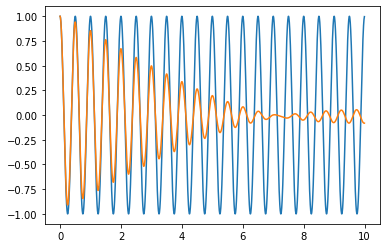

In [30]:
plt.plot(tau,np.cos(2*np.pi*om*tau))
plt.plot(tau,f)

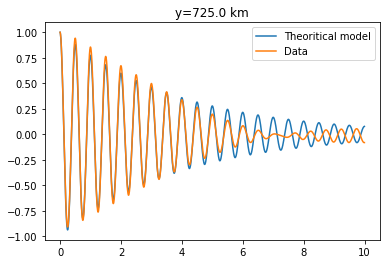

In [33]:
#A priori, we can expect only waves in this area (south of the jet): 
plt.title('y=%s km'%uu.sel(y_bins=700,method='nearest').y_bins.values)
plt.plot(tau,Ctilde(3.9,tau),label='Theoritical model')
plt.plot(tau,f,label='Data')
plt.legend()

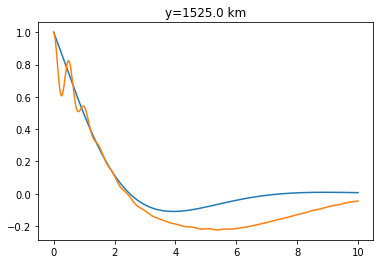

In [34]:
plt.title('y=%s km'%uu.sel(y_bins=1500,method='nearest').y_bins.values)
plt.plot(tau, Cbar(2,0.1,tau))
plt.plot(tau,uu.sel(y_bins=1500,method='nearest'))

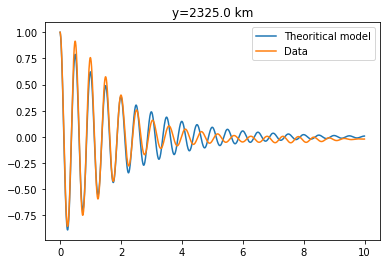

In [35]:
plt.plot(tau,Ctilde(2.1,tau),label='Theoritical model')
plt.plot(tau,uu.sel(y_bins=2300,method='nearest'),label='Data')
plt.title('y=%s km'%uu.sel(y_bins=2300,method='nearest').y_bins.values)
plt.legend()

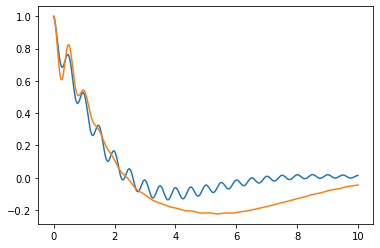

In [85]:
#Using the total formula:
plt.plot(tau, C(4,2,0.1,0.1,tau))
plt.plot(tau,uu.sel(y_bins=1500,method='nearest'))

In [64]:
tst = scipy.optimize.curve_fit(C,tau,uu.sel(y_bins=1500,method='nearest'))[0]

array([  0.5376652 ,   0.89675055, -17.08507774,   0.88050791])